In [2]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import h5py

In [5]:
model=load_model(r'C:\Users\G_dha\model.h5')
img=image.load_img(r'E:\ML project\Dataset\test_set\A\90.png',
                   target_size=(64,64))

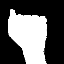

In [6]:
img

In [8]:
type(img)

PIL.Image.Image

In [9]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [10]:
x.shape

(64, 64, 3)

In [11]:
from skimage.transform import resize
def detect(frame):
    img=resize(frame,(64,64,1))
    img=np.expand_dims(img,axis=0)
    if(np.max(img)>1):
        img=img/255.0
        prediction=model.predict(img)
        print(prediction)
        prediction=model.predict_classes(img)
        print(prediction)

In [12]:
x=image.img_to_array(img)

In [13]:
frame=cv2.imread(r'E:\ML project\Dataset\test_set\C\2.png')
data=detect(frame)

In [14]:
cv2.imshow('frame',frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model.h5')
video=cv2.VideoCapture(0)
index=['A','B','C','D','E','F','G','H','I']
while 1:
    succes,frame=video.read()
    cv2.imwrite('image.jpg',frame)
    img=image.load_img('image.jpg',target_size=(64,64))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=np.argmax(model.predict(x),axis=1)
    y=pred[0]
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620,400), (255,0,0), 5)
    cv2.putText(frame,'The Predicted Alphabet is: '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows() 

1/1 [==============================] - 0s 52ms/step
